In [27]:
# load the digits dataset

# train k-means on the digits dataset
# calculate metrics for the k-means model: silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
# save the metrics
# do the same for other two clustering algorithms of your choice

In [28]:
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler

In [29]:
# Load the digits dataset
digits = datasets.load_digits()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

In [30]:
# KMeans
kmeans = KMeans(n_clusters=10, random_state=42)  # Assuming 10 clusters
kmeans_labels = kmeans.fit_predict(X_scaled)

#  metrics
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(digits.target, kmeans_labels)
ami_kmeans = adjusted_mutual_info_score(digits.target, kmeans_labels)

# Save the metrics
kmeans_metrics = {
    'Silhouette Score': silhouette_kmeans,
    'Adjusted Rand Index': ari_kmeans,
    'Adjusted Mutual Info Score': ami_kmeans
}
print("K-Means Metrics:", kmeans_metrics)

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Metrics: {'Silhouette Score': 0.1393772685169963, 'Adjusted Rand Index': 0.5344065110201505, 'Adjusted Mutual Info Score': 0.6678067570439229}


In [31]:
#  Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

#  metrics
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
ari_hierarchical = adjusted_rand_score(digits.target, hierarchical_labels)
ami_hierarchical = adjusted_mutual_info_score(digits.target, hierarchical_labels)

# Save the metrics
hierarchical_metrics = {
    'Silhouette Score': silhouette_hierarchical,
    'Adjusted Rand Index': ari_hierarchical,
    'Adjusted Mutual Info Score': ami_hierarchical
}
print("Hierarchical Clustering Metrics:", hierarchical_metrics)

Hierarchical Clustering Metrics: {'Silhouette Score': 0.12532527779196986, 'Adjusted Rand Index': 0.6643458356002894, 'Adjusted Mutual Info Score': 0.7934927361004457}


In [33]:
# BIRCH
birch = Birch(n_clusters=10)
birch_labels = birch.fit_predict(X_scaled)

#  metrics
silhouette_birch = silhouette_score(X_scaled, birch_labels)
ari_birch = adjusted_rand_score(digits.target, birch_labels)
ami_birch = adjusted_mutual_info_score(digits.target, birch_labels)

# Save the metrics
birch_metrics = {
    'Silhouette Score': silhouette_birch,
    'Adjusted Rand Index': ari_birch,
    'Adjusted Mutual Info Score': ami_birch
}
print("BIRCH Metrics:", birch_metrics)

BIRCH Metrics: {'Silhouette Score': 0.12532527779196986, 'Adjusted Rand Index': 0.6643458356002894, 'Adjusted Mutual Info Score': 0.7934927361004457}


### Metrics comparison between the different algorithms 

#### Silhouette Score: K-Means has a slightly higher silhouette score, suggesting it has slightly better-separated clusters compared to Hierarchical and BIRCH. But all three algorithms have a quite low score suggesting that there's little separation based on this metric 

#### Adjusted Rand Index:  Hierarchical and BIRCH clustering perform similarly and significantly better than K-Means in terms of how well they capture the true cluster structure.

#### Adjusted Mutual Info Score: Hierarchical and BIRCH have higher AMI scores than K-Means, indicating better agreement with the true labels.

#### Conclusion: Hierarchical and BIRCH outperform K-Means based on the adjusted rand index and the adjusted mutual information so I would pick one of those two since the benefits of the K-means on the silhouette score are minimal

In [15]:

# apply PCA to the dataset
# train the same clustering algorithms on the PCA-transformed dataset
# calculate the same metrics for the PCA-transformed dataset
# save the metrics
# do the same with TSNE and UMAP transformations

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # You can adjust the number of components as needed
digits_pca = pca.fit_transform(digits.data)

#  K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=10)
kmeans_pca_labels = kmeans_pca.fit_predict(digits_pca)

#  metrics
metrics_kmeans_pca = {
    "Silhouette Score": silhouette_score(digits_pca, kmeans_pca_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, kmeans_pca_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, kmeans_pca_labels)
}
print("K-Means PCA Metrics:", metrics_kmeans_pca)

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means PCA Metrics: {'Silhouette Score': 0.3925751408634242, 'Adjusted Rand Index': 0.3877792643489337, 'Adjusted Mutual Info Score': 0.522431797791598}


/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


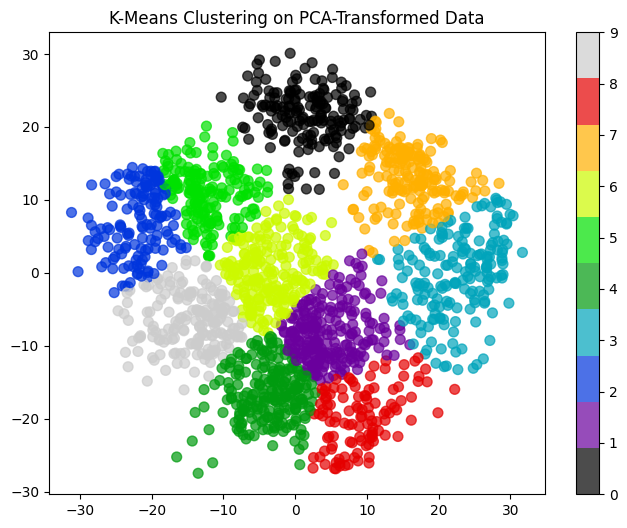

In [35]:
#PCA visualization 
def visualize_clusters(data_transformed, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)
    plt.title(title)
    plt.colorbar()
    plt.show()
    
visualize_clusters(digits_pca, kmeans_pca_labels, "K-Means Clustering on PCA-Transformed Data")

In [36]:
hierarchical_pca = AgglomerativeClustering(n_clusters=10)
hierarchical_pca_labels = hierarchical_pca.fit_predict(digits_pca)

# Hierarchical Clustering metrics for PCA
metrics_hierarchical_pca = {
    "Silhouette Score": silhouette_score(digits_pca, hierarchical_pca_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, hierarchical_pca_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, hierarchical_pca_labels)
}

print("Hierarchical Clustering PCA Metrics:", metrics_hierarchical_pca)


Hierarchical Clustering PCA Metrics: {'Silhouette Score': 0.35253640595810803, 'Adjusted Rand Index': 0.34276150187562765, 'Adjusted Mutual Info Score': 0.49723995427164186}


/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


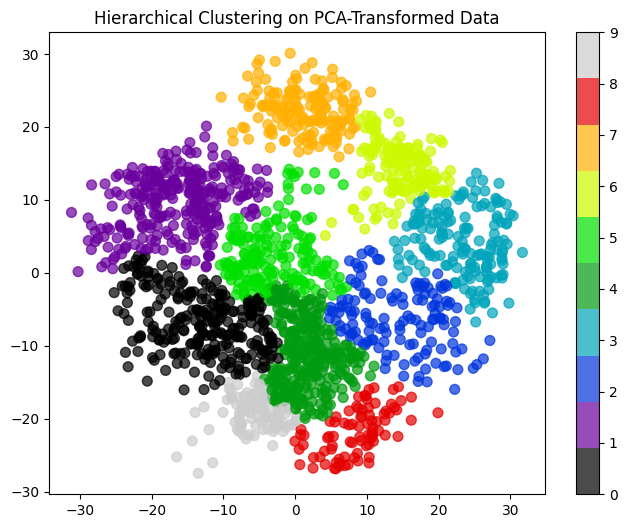

In [37]:
visualize_clusters(digits_pca, hierarchical_pca_labels, "Hierarchical Clustering on PCA-Transformed Data")


BIRCH PCA Metrics: {'Silhouette Score': 0.31681533263217876, 'Adjusted Rand Index': 0.36997579338357345, 'Adjusted Mutual Info Score': 0.49343717177935775}


/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


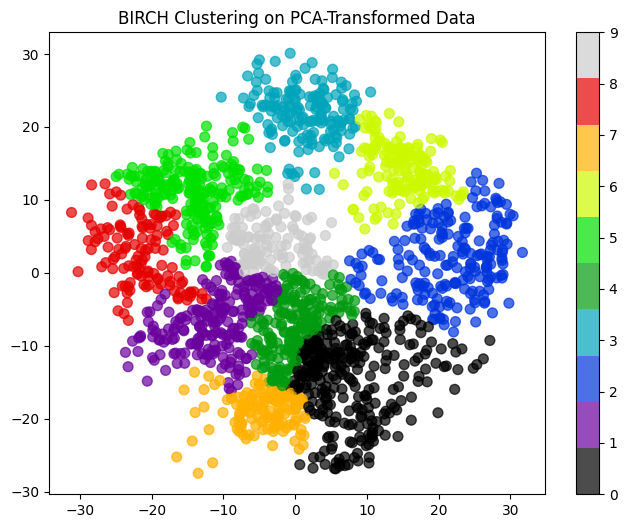

In [20]:
from sklearn.cluster import Birch

# Train BIRCH on PCA-transformed data
birch_pca = Birch(n_clusters=10)
birch_pca_labels = birch_pca.fit_predict(digits_pca)

# Calculate BIRCH metrics for PCA
metrics_birch_pca = {
    "Silhouette Score": silhouette_score(digits_pca, birch_pca_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, birch_pca_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, birch_pca_labels)
}

print("BIRCH PCA Metrics:", metrics_birch_pca)

# Visualize BIRCH clustering on PCA data
visualize_clusters(digits_pca, birch_pca_labels, "BIRCH Clustering on PCA-Transformed Data")

### t-SNE

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


K-Means t-SNE Metrics: {'Silhouette Score': 0.6074597701378541, 'Adjusted Rand Index': 0.8318708461967151, 'Adjusted Mutual Info Score': 0.8858034222283541}


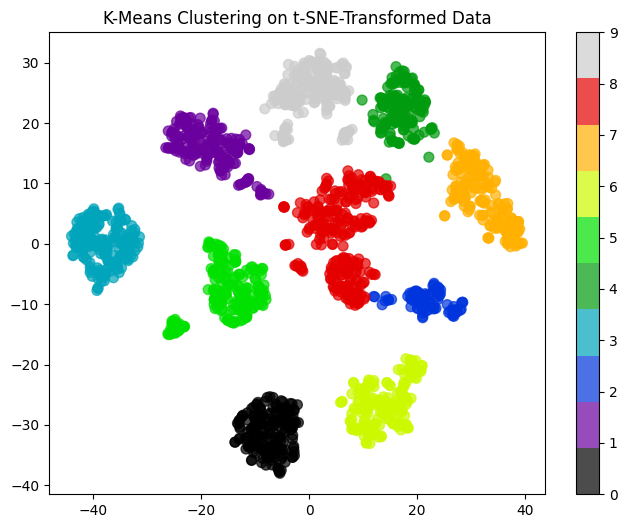

In [38]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Apply t-SNE
tsne = TSNE(n_jobs=4)  # Use all cores for performance
digits_tsne = tsne.fit_transform(digits.data)
# Train K-Means on t-SNE-transformed data
kmeans_tsne = KMeans(n_clusters=10)
kmeans_tsne_labels = kmeans_tsne.fit_predict(digits_tsne)
# Calculate K-Means metrics for t-SNE
metrics_kmeans_tsne = {
    "Silhouette Score": silhouette_score(digits_tsne, kmeans_tsne_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, kmeans_tsne_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, kmeans_tsne_labels)
}

print("K-Means t-SNE Metrics:", metrics_kmeans_tsne)

# Visualize K-Means clustering on t-SNE data
visualize_clusters(digits_tsne, kmeans_tsne_labels, "K-Means Clustering on t-SNE-Transformed Data")

Hierarchical Clustering t-SNE Metrics: {'Silhouette Score': 0.6056885970189334, 'Adjusted Rand Index': 0.8847887076341203, 'Adjusted Mutual Info Score': 0.9076748339457387}


/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


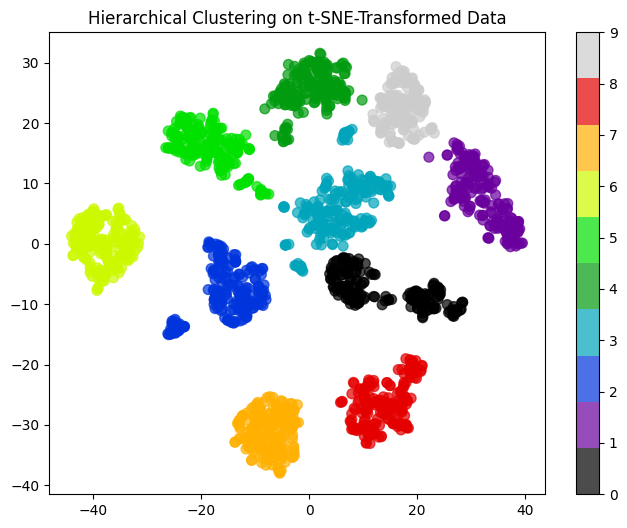

In [39]:
# Train Hierarchical Clustering on t-SNE-transformed data
hierarchical_tsne = AgglomerativeClustering(n_clusters=10)
hierarchical_tsne_labels = hierarchical_tsne.fit_predict(digits_tsne)

# Calculate Hierarchical Clustering metrics for t-SNE
metrics_hierarchical_tsne = {
    "Silhouette Score": silhouette_score(digits_tsne, hierarchical_tsne_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, hierarchical_tsne_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, hierarchical_tsne_labels)
}

print("Hierarchical Clustering t-SNE Metrics:", metrics_hierarchical_tsne)

# Visualize Hierarchical Clustering on t-SNE data
visualize_clusters(digits_tsne, hierarchical_tsne_labels, "Hierarchical Clustering on t-SNE-Transformed Data")

BIRCH t-SNE Metrics: {'Silhouette Score': 0.6017959102853961, 'Adjusted Rand Index': 0.86960869789233, 'Adjusted Mutual Info Score': 0.8970555010787726}


/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


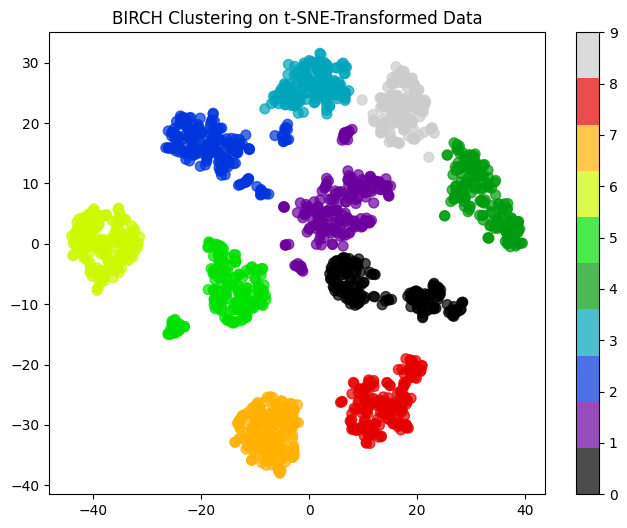

In [40]:
#  BIRCH on t-SNE-transformed data
birch_tsne = Birch(n_clusters=10)
birch_tsne_labels = birch_tsne.fit_predict(digits_tsne)

# BIRCH metrics for t-SNE
metrics_birch_tsne = {
    "Silhouette Score": silhouette_score(digits_tsne, birch_tsne_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, birch_tsne_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, birch_tsne_labels)
}

print("BIRCH t-SNE Metrics:", metrics_birch_tsne)

# Visualize BIRCH clustering on t-SNE data
visualize_clusters(digits_tsne, birch_tsne_labels, "BIRCH Clustering on t-SNE-Transformed Data")

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


K-Means UMAP Metrics: {'Silhouette Score': 0.77439153, 'Adjusted Rand Index': 0.8282612578657714, 'Adjusted Mutual Info Score': 0.9054396699552371}


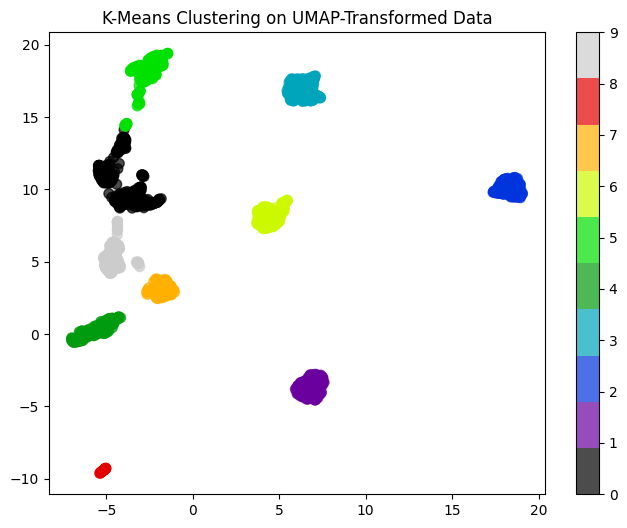

In [41]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
import umap

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
digits_umap = umap_model.fit_transform(X)

# Train K-Means on UMAP-transformed data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(digits_umap)

# Calculate K-Means metrics for UMAP
metrics_kmeans_umap = {
    "Silhouette Score": silhouette_score(digits_umap, kmeans_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, kmeans_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, kmeans_labels)
}

print("K-Means UMAP Metrics:", metrics_kmeans_umap)

#  K-Means clustering on UMAP data
visualize_clusters(digits_umap, kmeans_labels, "K-Means Clustering on UMAP-Transformed Data")

Hierarchical Clustering UMAP Metrics: {'Silhouette Score': 0.772932, 'Adjusted Rand Index': 0.8196345178024828, 'Adjusted Mutual Info Score': 0.9013183229446429}


/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


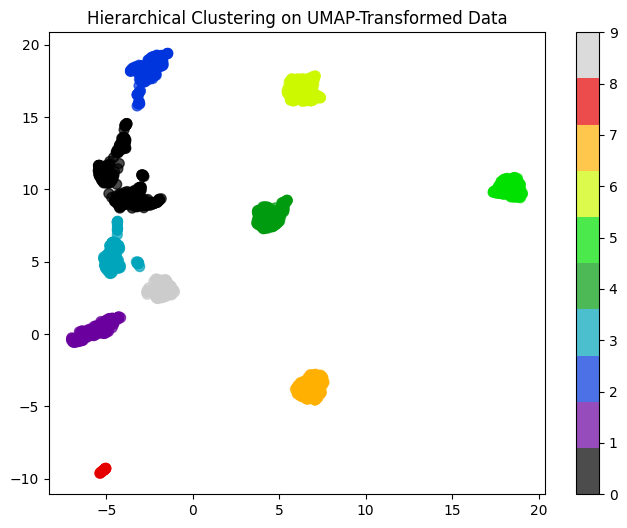

In [25]:

# Train Hierarchical Clustering on UMAP-transformed data
hierarchical_umap = AgglomerativeClustering(n_clusters=10)
hierarchical_umap_labels = hierarchical_umap.fit_predict(digits_umap)

# Calculate Hierarchical Clustering metrics for UMAP
metrics_hierarchical_umap = {
    "Silhouette Score": silhouette_score(digits_umap, hierarchical_umap_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, hierarchical_umap_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, hierarchical_umap_labels)
}

print("Hierarchical Clustering UMAP Metrics:", metrics_hierarchical_umap)
visualize_clusters(digits_umap, hierarchical_umap_labels, "Hierarchical Clustering on UMAP-Transformed Data")


BIRCH UMAP Metrics: {'Silhouette Score': 0.7304678, 'Adjusted Rand Index': 0.8351392906537441, 'Adjusted Mutual Info Score': 0.902098070774861}


/var/folders/hd/pkz6f8qd2j1487tn35pwb1wc0000gn/T/ipykernel_85178/888381814.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=50, alpha=0.7)


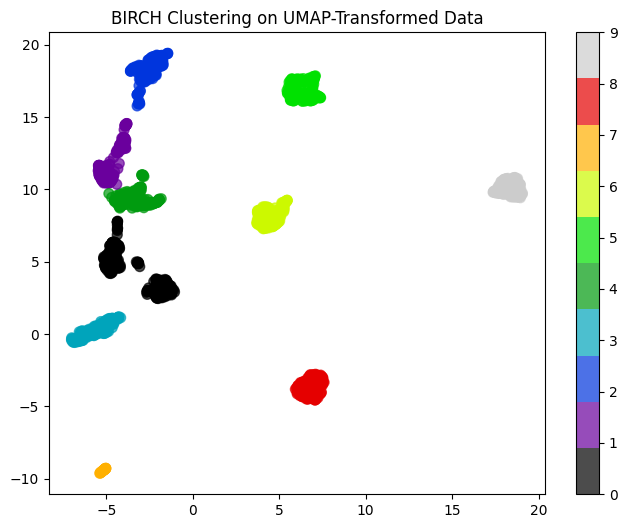

In [42]:
# BIRCH on UMAP-transformed data
birch_model = Birch(n_clusters=10)
birch_labels = birch_model.fit_predict(digits_umap)

# Calculate BIRCH metrics for UMAP
metrics_birch_umap = {
    "Silhouette Score": silhouette_score(digits_umap, birch_labels),
    "Adjusted Rand Index": adjusted_rand_score(digits.target, birch_labels),
    "Adjusted Mutual Info Score": adjusted_mutual_info_score(digits.target, birch_labels)
}

print("BIRCH UMAP Metrics:", metrics_birch_umap)
visualize_clusters(digits_umap, birch_labels, "BIRCH Clustering on UMAP-Transformed Data")


### Dimensionality reduction conclusions

#### t-SNE and UMAP generally provide better metrics compared to PCA, indicating that they are more effective for clustering tasks in this case with UMAP performing slightly better on clustering. 
#### t-SNE yields the highest Silhouette Score for K-Means and Hierarchical Clustering, suggesting that it is more effective at preserving the local structure of the data.
#### K-Means using UMAP achieves the highest Silhouette Score, suggesting optimal cluster separation.
#### Adjusted Rand Index and Adjusted Mutual Info Score compare the clustering result with the ground truth labels. Again, t-SNE transformations yield the best performance, particularly for K-Means and Hierarchical Clustering
#### The Silhouette score metric is particularly useful as it quantifies how similar an object is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined clusters, making it a reliable indicator of clustering quality.